In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
iris = pd.read_csv(r"C:\Users\amith\Downloads\iris_high_dimensional.csv")
X = iris.drop("target", axis=1)
y = iris["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["target"] = y

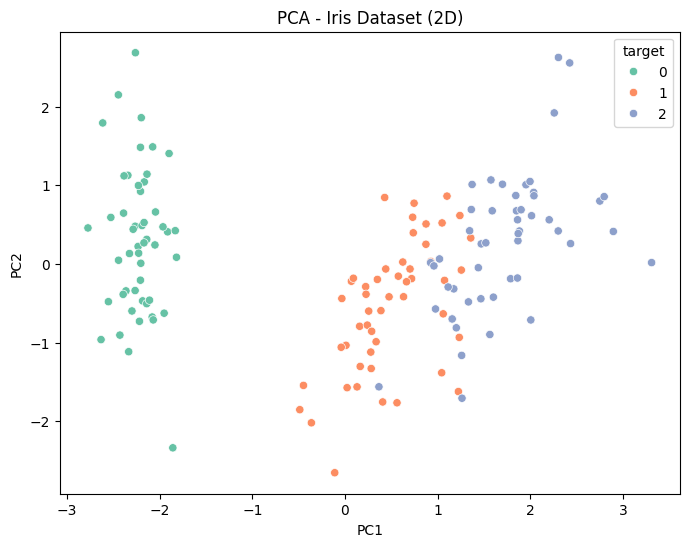

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette="Set2")
plt.title("PCA - Iris Dataset (2D)")
plt.show()

Project 2

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
stock = pd.read_csv(r"C:\Users\amith\Downloads\stock_prices.csv", parse_dates=["Date"])
stock.set_index("Date", inplace=True)
stock["Close"].fillna(method="ffill", inplace=True)


C:\Users\amith\AppData\Local\Temp\ipykernel_33484\1164241650.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock["Close"].fillna(method="ffill", inplace=True)
C:\Users\amith\AppData\Local\Temp\ipykernel_33484\1164241650.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock["Close"].fillna(method="ffill", inplace=True)


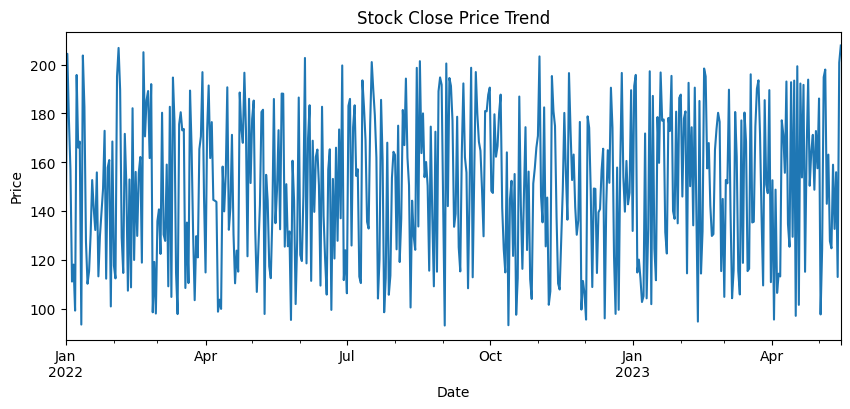

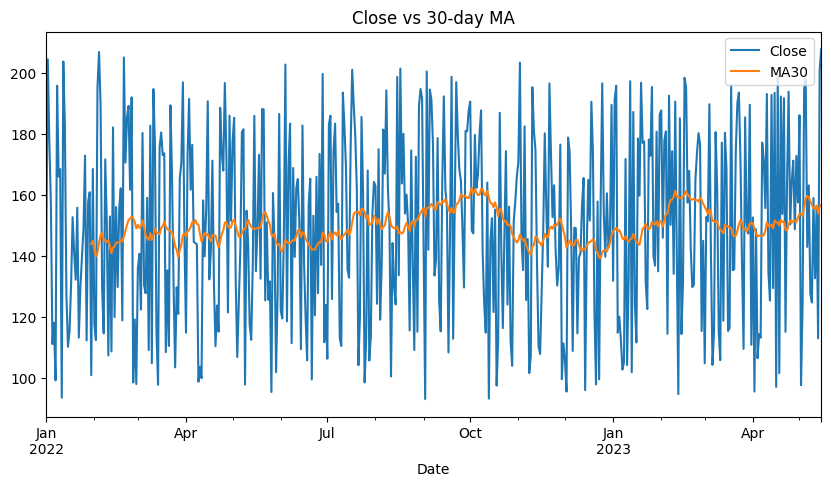

In [8]:
stock["Close"].plot(figsize=(10,4), title="Stock Close Price Trend")
plt.ylabel("Price")
plt.show()

# Moving average
stock["MA30"] = stock["Close"].rolling(30).mean()
stock[["Close", "MA30"]].plot(figsize=(10,5), title="Close vs 30-day MA")
plt.show()

C:\Users\amith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

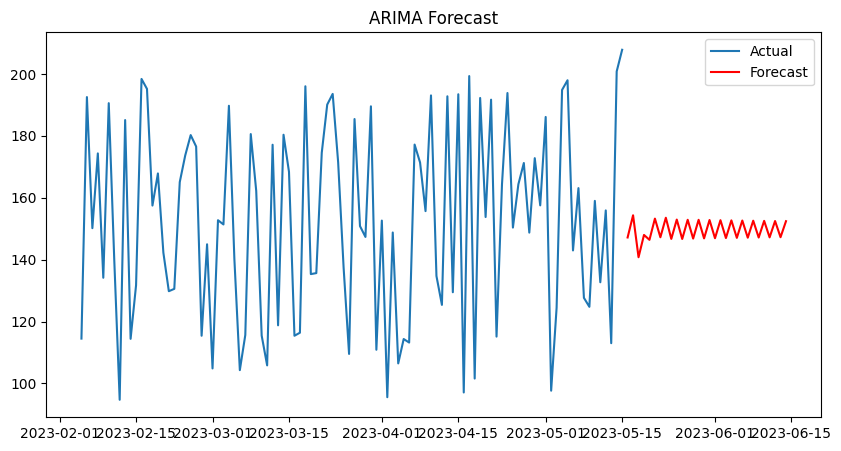

In [9]:
model = ARIMA(stock["Close"], order=(5,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

# Plot forecast vs actual
plt.figure(figsize=(10,5))
plt.plot(stock["Close"][-100:], label="Actual")
plt.plot(forecast.index, forecast.values, label="Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

In [10]:
actual = stock["Close"][-30:]
predicted = forecast[:30]
print("RMSE:", np.sqrt(mean_squared_error(actual, predicted)))
print("MAE:", mean_absolute_error(actual, predicted))

RMSE: 32.75659839120936
MAE: 28.01727067267113
